In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def SUQC_ODE_simulation(N,a,b,c,T,I0):
    """
    An ODE simulation that model time dependent variables: S, I, R
    
    N: N individuals the population has
    
    a: the number of individuals infected by an unquarantined individual per day
    
    b: the rate at which the cases are confirmed
    
    c: the rate at which unquarantined infected individuals get quarantined
    
    T: simulation time period
    
    I0: Initial number of infectious and unquarantined individuals
    
    """
    def f(t, v):
        """
        v = [S, U, Q, C]
        
        """
        dSdt = - (a * v[1] * v[0]) / N
        dUdt = (a * v[1] * v[0]) / N - c * v[1]
        dQdt = c * v[1] - b * v[2]
        dCdt = b * v[2]
        return [dSdt, dUdt, dQdt, dCdt]
    
    v0 = [(N-I0),I0,0,0]
    t_span = [0,T]
    t_eval = list(range(T))
    sol = solve_ivp(f, t_span, v0, t_eval=t_eval)
    return sol

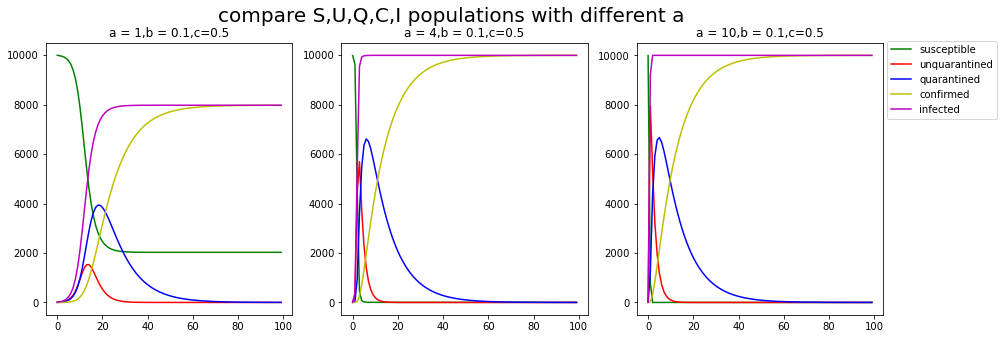

In [45]:
N = 10000
T = 100
I0 = 10
a_list = [1, 4, 10]
b_list = [0.1, 0.5, 0.8]
c_list = [0.1, 0.5, 0.8]

m, n = 1,3 # rows, columns of subplots
fig, ax = plt.subplots(m,n, figsize=(15,5))
fig.suptitle("compare S,U,Q,C,I populations with different a",fontsize=20)

for i,a in enumerate(a_list):
    b = b_list[0]
    c = c_list[1]
    sol = SUQC_ODE_simulation(N,a,b,c,T,I0)
    ax[i].plot(sol.t, sol.y[0], label="susceptible", c='g')
    ax[i].plot(sol.t, sol.y[1], label="unquarantined", c='r')
    ax[i].plot(sol.t, sol.y[2], label="quarantined", c='b')
    ax[i].plot(sol.t, sol.y[3], label="confirmed", c='y')
    ax[i].plot(sol.t, sol.y[1]+sol.y[2]+sol.y[3], label="infected", c='m')
    ax[i].set_title(f"a = {str(a_list[i])},b = {b},c={c}")

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines,labels,bbox_to_anchor=(1.01, 0.9), loc = 'upper right')


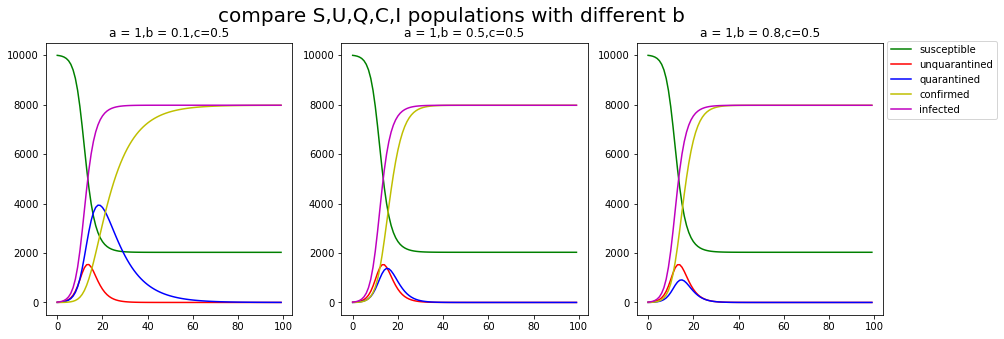

In [46]:
m, n = 1,3 # rows, columns of subplots
fig, ax = plt.subplots(m,n, figsize=(15,5))
fig.suptitle("compare S,U,Q,C,I populations with different b",fontsize=20)

for i,b in enumerate(b_list):
    a = a_list[0]
    c = c_list[1]
    sol = SUQC_ODE_simulation(N,a,b,c,T,I0)
    ax[i].plot(sol.t, sol.y[0], label="susceptible", c='g')
    ax[i].plot(sol.t, sol.y[1], label="unquarantined", c='r')
    ax[i].plot(sol.t, sol.y[2], label="quarantined", c='b')
    ax[i].plot(sol.t, sol.y[3], label="confirmed", c='y')
    ax[i].plot(sol.t, sol.y[1]+sol.y[2]+sol.y[3], label="infected", c='m')
    ax[i].set_title(f"a = {a},b = {str(b_list[i])},c={c}")
    
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines,labels,bbox_to_anchor=(1.01, 0.9), loc = 'upper right')


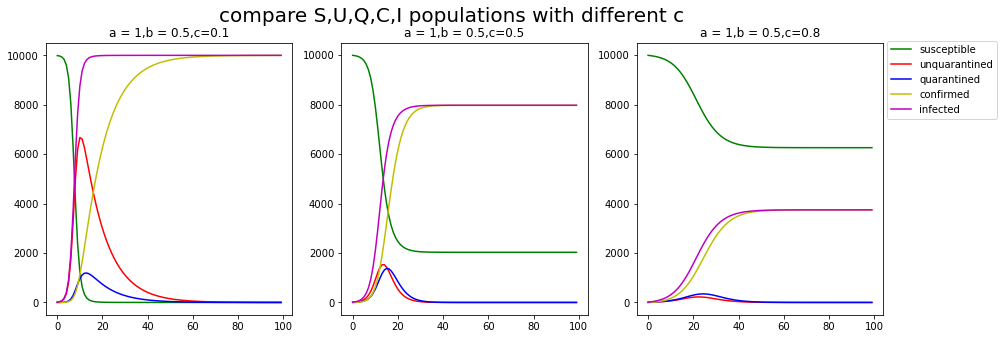

In [48]:
m, n = 1,3 # rows, columns of subplots
fig, ax = plt.subplots(m,n, figsize=(15,5))
fig.suptitle("compare S,U,Q,C,I populations with different c",fontsize=20)

for i,c in enumerate(c_list):
    a = a_list[0]
    b = b_list[1]
    sol = SUQC_ODE_simulation(N,a,b,c,T,I0)
    ax[i].plot(sol.t, sol.y[0], label="susceptible", c='g')
    ax[i].plot(sol.t, sol.y[1], label="unquarantined", c='r')
    ax[i].plot(sol.t, sol.y[2], label="quarantined", c='b')
    ax[i].plot(sol.t, sol.y[3], label="confirmed", c='y')
    ax[i].plot(sol.t, sol.y[1]+sol.y[2]+sol.y[3], label="infected", c='m')
    ax[i].set_title(f"a = {a},b = {b},c={str(c_list[i])}")
    
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines,labels,bbox_to_anchor=(1.01, 0.9), loc = 'upper right')
